In [1]:
import numpy as np
import pandas as pd
#import Scikit-learn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#import data csv
df = pd.read_csv('../Datasets/NVDA Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%


In [3]:
#in ra thông tin thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1624 non-null   object 
 1   Price     1624 non-null   float64
 2   Open      1624 non-null   float64
 3   High      1624 non-null   float64
 4   Low       1624 non-null   float64
 5   Vol.      1624 non-null   object 
 6   Change %  1624 non-null   object 
dtypes: float64(4), object(3)
memory usage: 88.9+ KB


In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%
...,...,...,...,...,...,...,...
1619,6/9/2023,387.70,390.37,397.11,385.67,42.77M,0.68%
1620,6/12/2023,394.82,392.00,395.30,386.18,38.44M,1.84%
1621,6/13/2023,410.22,401.86,411.01,397.40,60.77M,3.90%
1622,6/14/2023,429.97,408.24,430.00,405.52,72.94M,4.81%


In [5]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150200000.0,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119920000.0,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98430000.0,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82290000.0,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91620000.0,4.07%
...,...,...,...,...,...,...,...
1619,6/9/2023,387.70,390.37,397.11,385.67,42770000.0,0.68%
1620,6/12/2023,394.82,392.00,395.30,386.18,38440000.0,1.84%
1621,6/13/2023,410.22,401.86,411.01,397.40,60770000.0,3.90%
1622,6/14/2023,429.97,408.24,430.00,405.52,72940000.0,4.81%


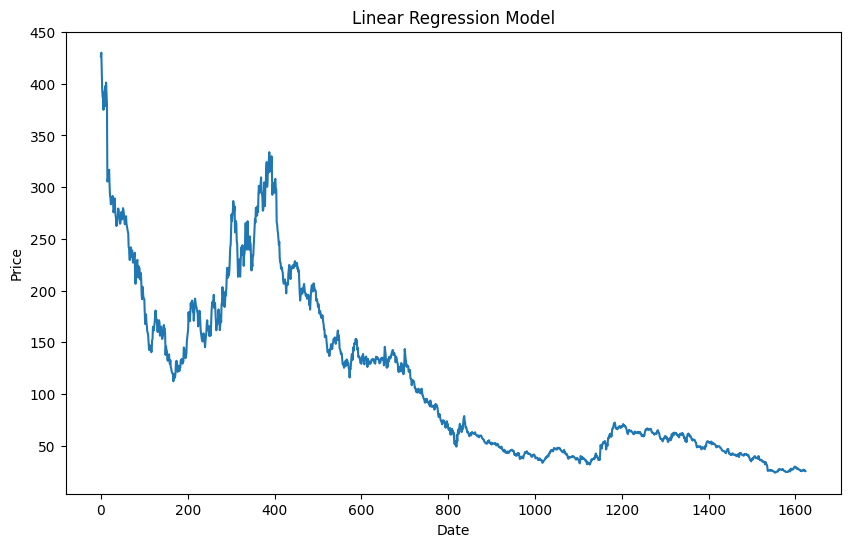

In [7]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.title('Linear Regression Model')
plt.show()

In [8]:
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-85.61503922 -85.83077439 -86.04650956 -86.26224473 -86.4779799
 -86.69371507 -86.90945024 -87.12518541 -87.34092058 -87.55665575
 -87.77239092 -87.98812609 -88.20386126 -88.41959643 -88.6353316
 -88.85106677 -89.06680194 -89.28253711 -89.49827228 -89.71400745
 -89.92974262 -90.14547779 -90.36121296 -90.57694813 -90.7926833
 -91.00841847 -91.22415364 -91.43988881 -91.65562398 -91.87135915]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 42.89613433641148
Testing MSE: 1840.07834100746
Testing MAE: 33.46423212662428
Validation RMSE: 93.0460571938271
Validation MSE: 8657.568759316942
Validation MAE: 92.6027990519603


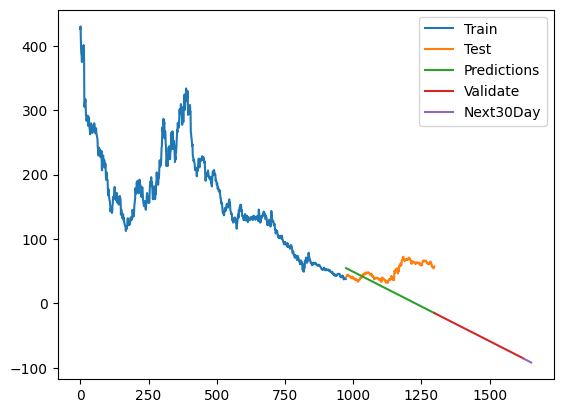

In [13]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()